# Email Spam/Ham Prediction

### Tipik ML Text Pipeline'ı

1) Tokenize etme - Cümleleri kelimelere ayırma

2) Metni temizleme - Gereksiz sözcükleri, noktalama işaretlerini silme ve kelime köklerini bulma

3) Vektörize etme - Kelimeleri numerik forma dönüştürme

4) ML algoritması eğitme

#### Verinin dosyadan okunması

In [1]:
import pandas as pd

data_train = pd.read_csv("SMS_train.csv", encoding="Windows-1252")
data_test = pd.read_csv("SMS_test.csv", encoding="Windows-1252")


In [2]:
data_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [3]:
data_test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [4]:
data_train.shape

(957, 3)

In [5]:
data_test.shape

(125, 3)

In [6]:
data = pd.concat([data_train,data_test], axis=0)

In [7]:
data.shape

(1082, 3)

In [8]:
data.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [9]:
data = data.drop('S. No.', axis=1)

In [10]:
data

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [11]:
data.groupby('Label').count()

,Message_body
Label,
Non-Spam,884
Spam,198


Görüldüğü üzere veri imbalanced. Yani dengesiz. Bu sorunu çözmek için çeşitli yöntemler bulunuyor. Örneğin az olan veri kategorisine over-sampling veya under-sampling ile yeni veriler eklenebilir veya çıkartılabilir.

In [12]:
#Eksik veri var mı?

print("Number of null in label: {}".format(data['Label'].isnull().sum()))
print("Number of null in Message body : {}".format(data['Message_body'].isnull().sum()))

Number of null in label: 0
Number of null in Message body : 0


#### Noktalama işaretlerinin silinmesi

Python noktalama işaretlerini de kelime olarak algıladığı için metni kelimelere ayırmadan önce noktalama işaretlerini silmeliyiz. Noktalama işaretleri silinirken string kütüphanesinden faydalanacağız. String kütüphanesinde noktalama işaretlerinin listesi hazır şekilde bulunmakta.

In [13]:
"I Like NLP." == "I Like NLP"

False

Görüldüğü üzere iki metin anlam olarak birebir aynı olmasına rağmen noktalama işareti farkından dolayı Python farklı olduğunu düşünüyor.

In [14]:
import string

def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['text_nopunct'] = data['Message_body'].apply(lambda x: remove_punct(x))

data.head()

,Message_body,Label,text_nopunct
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...


#### Tokenize Etme

Metni kelimelere ayırırken regexleri kullanacağız. Regexler herhangi bir metni eşleştirmenize, bulmanıza ya da yönetmenize yardımcı olacak desenler yaratmanıza izin veren birçok karakter ve sembollerin bir araya gelmesiyle oluşan metin dizesidir. Tokenize etme işleminde "re" kütüphanesinden faydalanacağız.

In [15]:
import re

def tokenize(text):
    return re.split('\W+', text)

data['tokenized'] = data['text_nopunct'].apply(lambda x: tokenize(x))

data.head()

,Message_body,Label,text_nopunct,tokenized
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]"
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,..."
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,..."
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]"
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."


#### Gereksiz sözcükleri silme

Noktalama işaretlerini silip metni kelimelere ayırdıktan sonra bu kelimelerden bi anlam ifade etmeyen, gereksiz sözcükleri sileceğiz. Bunun için NLTK kütüphanesinden faydalanacağız. 

In [16]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
def lower(text):
    text = " ".join([word.lower() for word in text ])
    return re.split('\W+',text)

data['lower'] = data['tokenized'].apply(lambda x: lower(x))

data.head()

,Message_body,Label,text_nopunct,tokenized,lower
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]","[rofl, its, true, to, its, name]"
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,..."
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[pity, was, in, mood, for, that, soany, other,..."
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, going, to, esplanade, fr, home]"
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,..."


In [18]:
def remove_stopwords(text):
    return ([words for words in text if words not in stopwords])

data['removed'] = data['lower'].apply(lambda x: remove_stopwords(x))

data.head()

,Message_body,Label,text_nopunct,tokenized,lower,removed
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]","[rofl, its, true, to, its, name]","[rofl, true, name]"
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun..."


#### Kelimeleri Köklerine Ayırma ( Stemming ve Lemmatizing)

Stemming Algoritmaları, ekli bir kelimede bulunabilen ortak ön eklerin ve son eklerin bir listesini dikkate alarak kelimenin başlangıcını veya sonunu kesmeye çalışır.


In [19]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [20]:
def stemming(text):
    return [ps.stem(word) for word in text]

data['stemmed'] = data['removed'].apply(lambda x: stemming(x))

data.head()

,Message_body,Label,text_nopunct,tokenized,lower,removed,stemmed
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]","[rofl, its, true, to, its, name]","[rofl, true, name]","[rofl, true, name]"
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]"
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tri, 2, contact, u, u, 750, pound,..."


In [21]:
def lemmatizing(text):
    return [wn.lemmatize(words) for words in text]

data['lemmatized'] = data['removed'].apply(lambda x: lemmatizing(x))

data.head()

,Message_body,Label,text_nopunct,tokenized,lower,removed,stemmed,lemmatized
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]","[rofl, its, true, to, its, name]","[rofl, true, name]","[rofl, true, name]","[rofl, true, name]"
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]"
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tri, 2, contact, u, u, 750, pound,...","[2nd, time, tried, 2, contact, u, u, 750, poun..."


#### Vektörize Etme

Tüm ön işlemeleri tamamlanan verisetini artık vektörize ederek makine öğrenmesi algoritmasına sokabiliriz.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    text = "".join([word.lower() for word in text ])
    text = ''.join([char for char in text if char not in string.punctuation]) # Noktalama temizleme
    text = re.split('\W+', text)  # Tokenize etme
    text = [ps.stem(char) for char in text if char not in stopwords] # Gereksiz sözcükleri silme ve o sözcüklerin köklerini bulma
    text = ' '.join([char for char in text if len(char)>1]) # Tek harfli kelimeleri silme
    return text

data['clean'] = data['Message_body'].apply(lambda x: clean_text(x))

tfidf_vect = TfidfVectorizer()

X_tfidf = tfidf_vect.fit_transform(data['clean'])

In [23]:
X_tfidf.shape

(1082, 3164)

In [24]:
print(tfidf_vect.get_feature_names())

['0121', '0207', '02070836089', '02073162414', '020903', '021', '060505', '061104', '07046744435', '07099833605', '07123456789', '07732584351', '07742676969', '0776xxxxxxx', '078', '07808247860', '07808726822', '0784987', '0800', '08000839402', '08000930705', '08000938767', '08001950382', '08002986030', '08002986906', '08006344447', '0808', '0844', '08448350055', '0845', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '08701417012', '08701417012150p', '08702840625comuk', '08708034412', '08708800282', '08712101358', '08712300220', '08712405020', '08712460324', '0871277810710pmin', '0871277810810', '0871277810910pmin', '08714712412', '08715203652', '08715203656', '08715203685', '08715205273', '08715705022', '08717205546', '08717507382', '08717507711', '08717509990', '08718720201', '08718726270', '08718726270150gbpmtmsg18', '087187272008', '08718729758', '08718738001', '08718738002', '08719180219', '08719180248', '08719899229', '09050000332', '09050090044', '

In [25]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

X_tfidf_df.columns = tfidf_vect.get_feature_names()

X_tfidf_df.tail()

,0121,0207,02070836089,02073162414,020903,021,060505,061104,07046744435,07099833605,...,your,youv,yovil,yr,yummi,yuo,yup,zebra,zed,zero
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feature Engineering

Message_body kolonuna bakarak başka hangi özellikler çıkartılabilir? Hangi anlamları çıkartabilirim sorularını sorarsak;

Örneğin mesajların uzunluğuyla yani kaç harf içerdiğiyle spam veya non spam olması arasında bir ilişki olabilir mi? Bunu test edelim.

In [26]:
data['body_len'] = data['Message_body'].apply(lambda x: len(x) - x.count(" "))

data.head()

,Message_body,Label,text_nopunct,tokenized,lower,removed,stemmed,lemmatized,clean,body_len
0,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name,"[Rofl, Its, true, to, its, name]","[rofl, its, true, to, its, name]","[rofl, true, name]","[rofl, true, name]","[rofl, true, name]",rofl true name,21
1,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b...",guy bitch act like id interest buy someth els ...,100
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]",piti mood soani suggest,48
3,Will ü b going to esplanade fr home?,Non-Spam,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanad, fr, home]","[ü, b, going, esplanade, fr, home]",go esplanad fr home,29
4,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tri, 2, contact, u, u, 750, pound,...","[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time tri contact 750 pound prize claim eas...,131


#### Oluşturulan Feature'ların Değerlendirilmesi

In [27]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

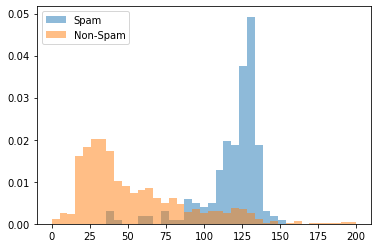

In [28]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['Label'] == 'Spam']['body_len'], bins,alpha=0.5, density = True, stacked=True, label='Spam')
pyplot.hist(data[data['Label'] == 'Non-Spam']['body_len'], bins,alpha=0.5, density = True, stacked=True, label='Non-Spam')
pyplot.legend(loc="upper left")
pyplot.show()

#### Finalize Etme

Artık metni nasıl temizleyeceğimizi, hangi kök bulma yöntemini kullanacağımızı, hangi featureı ekleyebileceğimizi biliyoruz. O halde tek bir fonksiyonla tüm bu işlemleri yapalım ve vektörize ederek ML algoritmasına göndermeye uygun hale getirelim.

In [29]:
import nltk
import pandas as pd
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
data = pd.concat([data_train,data_test], axis=0)

data['body_len'] = data['Message_body'].apply(lambda x: len(x) - x.count(" "))

data.drop('S. No.', inplace=True,axis=1)

def clean_text(text):
    text = "".join([word.lower() for word in text ])
    text = ''.join([char for char in text if char not in string.punctuation]) # Noktalama temizleme
    text = re.split('\W+', text)  # Tokenize etme
    text = [ps.stem(char) for char in text if char not in stopwords] # Gereksiz sözcükleri silme ve o sözcüklerin köklerini bulma
    text = ' '.join([char for char in text if len(char)>1]) # Tek harfli kelimeleri silme
    return text

data['clean'] = data['Message_body'].apply(lambda x: clean_text(x))

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['clean'])

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

X_tfidf_df.columns = tfidf_vect.get_feature_names()

#X_features = pd.merge([data['body_len'], X_tfidf_df], axis=1)

In [30]:
import nltk
import pandas as pd
import re
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
lm = nltk.WordNetLemmatizer()
data = pd.concat([data_train,data_test], axis=0)

data['body_len'] = data['Message_body'].apply(lambda x: len(x) - x.count(" "))

data.drop('S. No.', inplace=True,axis=1)

def clean_text(text):
    text = "".join([word.lower() for word in text ])
    text = ''.join([char for char in text if char not in string.punctuation]) # Noktalama temizleme
    text = re.split('\W+', text)  # Tokenize etme
    text = [ps.stem(char) for char in text if char not in stopwords] # Gereksiz sözcükleri silme ve o sözcüklerin köklerini bulma
    text = ' '.join([char for char in text if len(char)>1]) # Tek harfli kelimeleri silme
    return text

data['clean'] = data['Message_body'].apply(lambda x: clean_text(x))

tfidf_vect = TfidfVectorizer()
X_tfidf_fit = tfidf_vect.fit(data['clean'])
X_tfidf = X_tfidf_fit.transform(data['clean'])

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

X_tfidf_df.columns = tfidf_vect.get_feature_names()

#X_features = pd.concat([data['body_len'], X_tfidf_df].reset_index(drop=True), axis=1)

#### Makine Öğrenmesi Algoritmasının Uygulanması

Değişkenlerimizi belirleyip, kelimeleri makinenin anlayacağı forma dönüştürdükten sonra ML algoritmasını uygulayabiliriz.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

y = data['Label']
X = X_tfidf_df
#Verilerin train ve test olarak ayrılması

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RF = RandomForestClassifier(n_jobs=-1)
RF_model = RF.fit(X_train,y_train)

In [32]:
sorted(zip(RF_model.feature_importances_, X_train.columns), reverse=True)

[(0.03670383091726082, 'call'),
 (0.0304439264771095, 'mobil'),
 (0.02969077866347653, 'txt'),
 (0.026744391139829893, 'free'),
 (0.022336217959417808, 'claim'),
 (0.019083053869682943, 'text'),
 (0.017821784250420213, 'contact'),
 (0.016980598236843166, 'prize'),
 (0.01642022612334198, 'repli'),
 (0.01617436854403046, 'latest'),
 (0.014499794019769809, '16'),
 (0.01308745717375133, 'stop'),
 (0.012035312575468724, 'win'),
 (0.011057042402061694, 'servic'),
 (0.010407831011366407, 'tc'),
 (0.01022227069091447, 'award'),
 (0.009689501398482157, 'select'),
 (0.00928598801753796, 'code'),
 (0.009193053755046999, 'custom'),
 (0.009049998785726694, 'urgent'),
 (0.008090256476474546, 'cash'),
 (0.007825389263692563, 'tone'),
 (0.007442162205261618, '1000'),
 (0.00636189021899915, 'receiv'),
 (0.00628029290826636, 'per'),
 (0.006211643571784389, 'rington'),
 (0.006066976295663374, 'privat'),
 (0.005531900453466143, 'nokia'),
 (0.005518609859652455, 'collect'),
 (0.005406997210719427, 'account

In [33]:
y_pred = RF_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label="Spam", average="binary")

In [34]:
print('Precision: {}, / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                          round(recall,3),
                                                          round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0, / Recall: 0.769 / Accuracy: 0.959


Precision: 1.0 means ***All mail in the spam folder is actually spam. Spam olarak sınıflandırılanların hepsi gerçekten spam. Yani spam kutusuna hiç spam olmayan mail kaçmamış.*** 

Recall: 0.523 means ***52.3% of spam mails which came in your inbox are placed in spam box. Mail kutusuna gelen spam maillerin %66'ini spam olarak etiketlemişiz. ***

Accuracy: 0.935 means ***93% of your mails which came in your inbox properly classified as ham or spam. Mail kutusuna gelen tüm mailleri %94 oranında spam veya değil olarak doğru sınıflandırmışız. ***


#### Hiper Parametre Tuning

Çıktıları beğenmiyorsak hiper parametre tuning ile modelin ince ayrıntılarını değiştirerek istediğimiz sonuca yaklaşmaya çalışabiliriz.

from sklearn.model_selection import GridSearchCV

RF_best_model = RandomForestClassifier()
param = {'n_estimators' : [10,150,300],
        'max_depth' : [30,60,90,None]}

gs = GridSearchCV(RF_best_model,cv=5, n_jobs=-1)
gs_fit = (X_tfidf_df, data['Label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[178,   0],
       [  9,  30]], dtype=int64)

In [37]:
import pickle

filename = "RandomForestModel.sav"

pickle.dump(RF_model,open(filename,'wb'))


In [38]:
loaded_model = pickle.load(open(filename,'rb'))
preds = loaded_model.predict(X_test)
score = loaded_model.score(X_test,y_test)
print(preds)
print(score)

['Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam'
 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Spam'
 'Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam'


#### Son Uygulama

In [49]:
text = "FREE entry into our £250 weekly competition just text the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk"

clean_text(text)

'free entri 250 weekli competit text word win 80086 18 tc wwwtxttowincouk'

In [50]:
a = X_tfidf_fit.transform([text])

In [51]:
print(loaded_model.predict(a))

['Spam']
